In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
house = pd.read_csv('/Users/aishwaryaramakrishnan/Desktop/kc_house_data.csv')
house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [26]:
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [27]:
#Deleting the date column
del(house['date'])

In [28]:
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
#Converting the datatype to integer
house.price = house.price.astype(int)
house.bathrooms = house.bathrooms.astype(int)
house.floors = house.floors.astype(int)
house.lat = house.lat.astype(int)
house.long = house.long.astype(int)

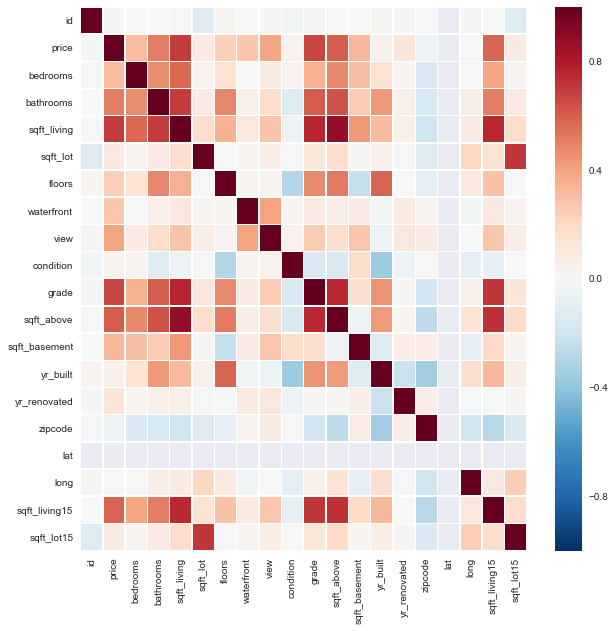

In [30]:
# Correlation plot
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(house.corr(), linewidths=.5, ax=ax)
plt.show()

In [31]:
#checking for NULL values
house.isnull().values.any()

False

In [32]:
import numpy as np
np.mean(house['price'])

540088.1417665294

In [33]:
# Replacing outliers with mean
#sum(i > 4000000 for i in house['price'])   # Checks the number of values greater than 4000000

#house['price'] = np.where((house['price'] > 4000000), 540088)                  
house[house['price'] > 4000000] = 540088

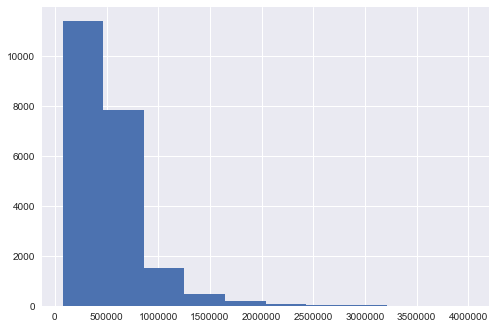

In [34]:
plt.hist(house['price'])
plt.show()

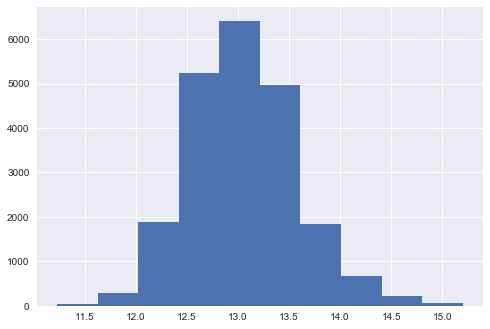

In [35]:
# Dependent variable is not normally distributed. Therefore taking log normal distribution
# Hist plot of the dependent variable
house['price'] = np.log(house['price'])
plt.hist(house['price'])
plt.show()

In [36]:
# Segregating the dependent and independent variables
x = house[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition',
          'grade','sqft_above','yr_built','yr_renovated','zipcode','sqft_living15','sqft_lot15']]

y = house['price']

In [65]:
# Creating test and training datasets
(x_train,x_test,y_train,y_test) = train_test_split(x,y)

In [66]:
print(len(x_train),len(y_train),len(x_test),len(x_test))

16209 16209 5404 5404


In [57]:
# Linear regression
lm = LinearRegression()
lm.fit(x_train,y_train)
predict_outcome = lm.predict(x_test)
score = lm.score(x_test,y_test)
rmse = sqrt(mean_squared_error(predict_outcome, y_test))
print(score,rmse)

0.634925794411 0.3182449474919573


In [53]:
# Ridge
ridge = Ridge(alpha= 0.01,normalize=True)
ridge.fit(x_train,y_train)
predict1 = ridge.predict(x_test)
score1 = ridge.score(x_test,y_test)
rmse_1 = sqrt(mean_squared_error(predict1, y_test))
print(score1,rmse_1)

0.341603240617 0.42738058120685346


In [54]:
# Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train,y_train)
predict2 = lasso.predict(x_test)
score2 = lasso.score(x_test,y_test)
rmse_2 = sqrt(mean_squared_error(predict2, y_test))
print(score2,rmse_2)

-8.50981411926e-05 0.5267316575769335


In [44]:
# Elasticnet
elastic = ElasticNet(alpha=0.01, l1_ratio=1, normalize=False)
elastic.fit(x_train,y_train)
predict3= elastic.predict(x_test)
score3 = elastic.score(x_test,y_test)
rmse_3 = sqrt(mean_squared_error(predict3, y_test))
print(score3,rmse_3)

0.485055762002 0.37870144669082434


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [45]:
# Random Forest
lrf = RandomForestRegressor(n_estimators=500,min_samples_split=350)
lrf.fit(x_train,y_train)
predict4 = lrf.predict(x_test)
score4 = lrf.score(x_test,y_test)
rmse_4 = sqrt(mean_squared_error(predict4, y_test))
print(score4,rmse_4)

0.722976408612 0.2777635412004158


In [46]:
# Ensemble technique
clf = ensemble.GradientBoostingRegressor(n_estimators= 400, max_depth=5,min_samples_split=2,
                                                              learning_rate=0.1, loss = 'ls')
clf.fit(x_train,y_train)
predict5 = clf.predict(x_test)
score5 = clf.score(x_test,y_test)
rmse_5 = sqrt(mean_squared_error(predict5, y_test))
print(score5,rmse_5)

0.884405787423 0.17942580698069066
